# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

In this notebook we employed the **square of the 2-norm distance**. This metric computes the mean distance of every point to its cluster.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [3]:
X = r.readWord2Vec()
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[ 0.02987077 -0.15110606 -0.02884087 ...,  0.02446168 -0.08834651
  -0.09221231]
 [ 0.05298314 -0.05420527  0.02592565 ...,  0.01782615 -0.02950471
   0.00508323]
 [ 0.07016749 -0.05757345 -0.13483836 ...,  0.10909334 -0.0250241
  -0.0654501 ]
 ..., 
 [ 0.10532002 -0.05241808 -0.02433    ..., -0.01405231  0.03333547
   0.01318201]
 [ 0.10429937 -0.1797766  -0.05073992 ...,  0.01325834 -0.18105656
  -0.07903843]
 [ 0.13153867 -0.05729359 -0.04480435 ..., -0.00396843 -0.05132721
   0.00955163]]
(13229, 128)


In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_jobs=-1,n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Elbow Method --- K-means++
This methods aims to define the best number of clusters (K) by the cost function J computed during the K-means.

In [7]:
error = 0
Ks = []
Js = []
Epsilon = 1e-2
it = 1
J = 0.

k = 2
print("###############################")
while ((error > Epsilon) or (it == 1)):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_clusters=k,random_state=42,n_jobs=-1)
    cluster_result = cluster.fit(X)
    print("Finished")
    error = J
    J = cluster_result.inertia_ / X.shape[0]        
    print("J =",J)
    error = abs(error-J)  
    Ks.append(k)
    print("error =",error)
    Js.append(J)
    k += 10
    it += 1
    print("###############################")
    
best_K = k-10
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.448818183369
error = 0.448818183369
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.412735051949
error = 0.0360831314194
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.398943560752
error = 0.013791491197
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.391037427491
error = 0.00790613326107
###############################

Best k: 32
Number of iterations: 5


J  [0.44881818336885326, 0.41273505194940863, 0.39894356075238313, 0.39103742749130838]
Ks  [2, 12, 22, 32]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

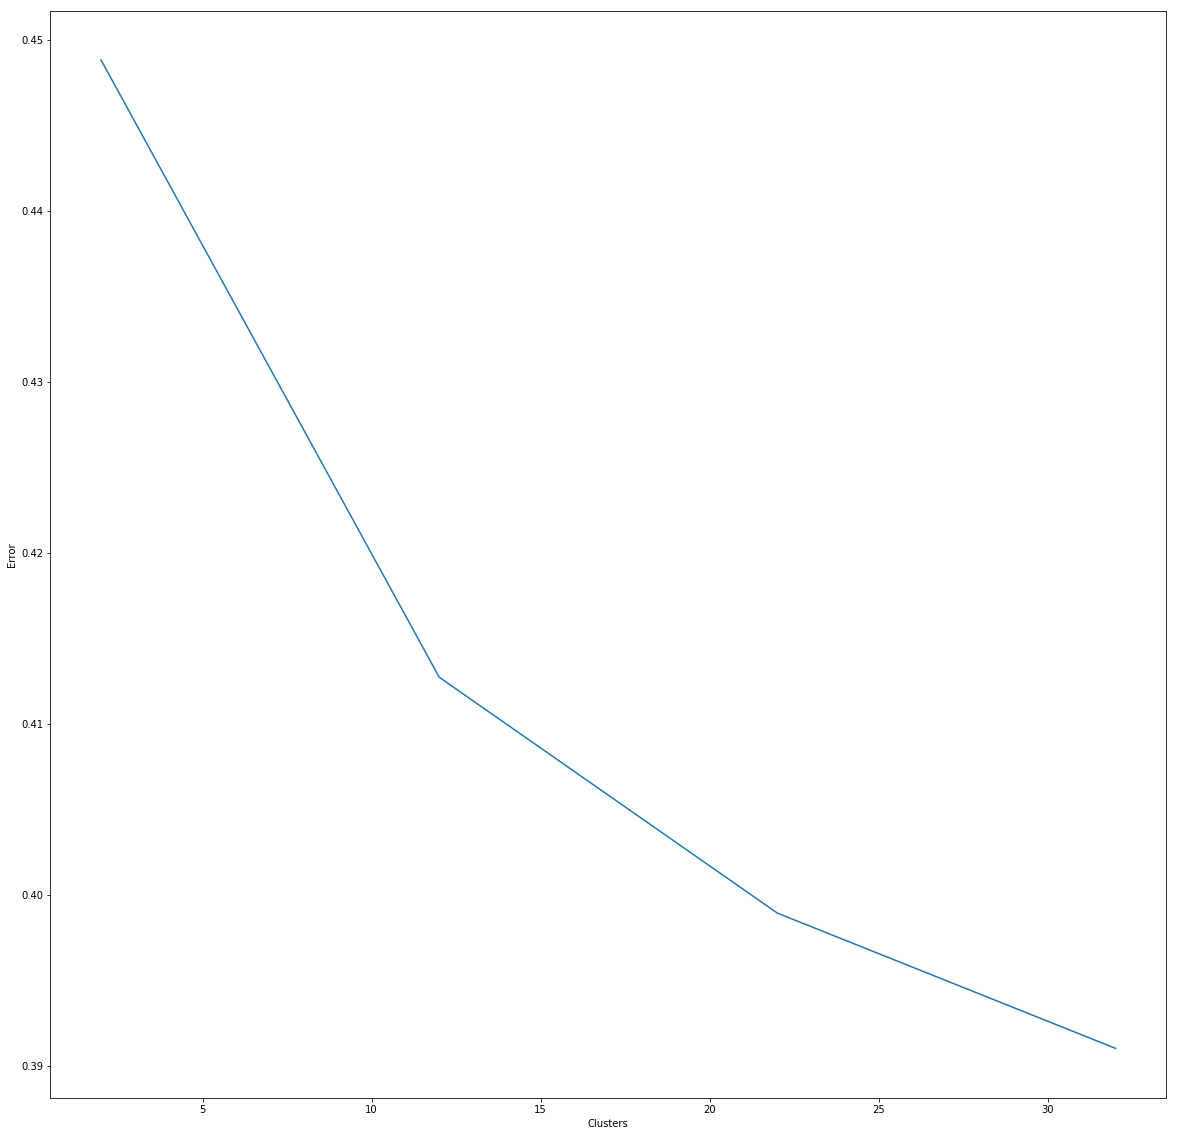

In [8]:
v.plot_cluster_errors(Ks,Js)

After analysing the elbow curve, we conclude that the best number of clusters (K) is 52.

In [9]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 32
Applying K-means
Finished
#############################


In [10]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

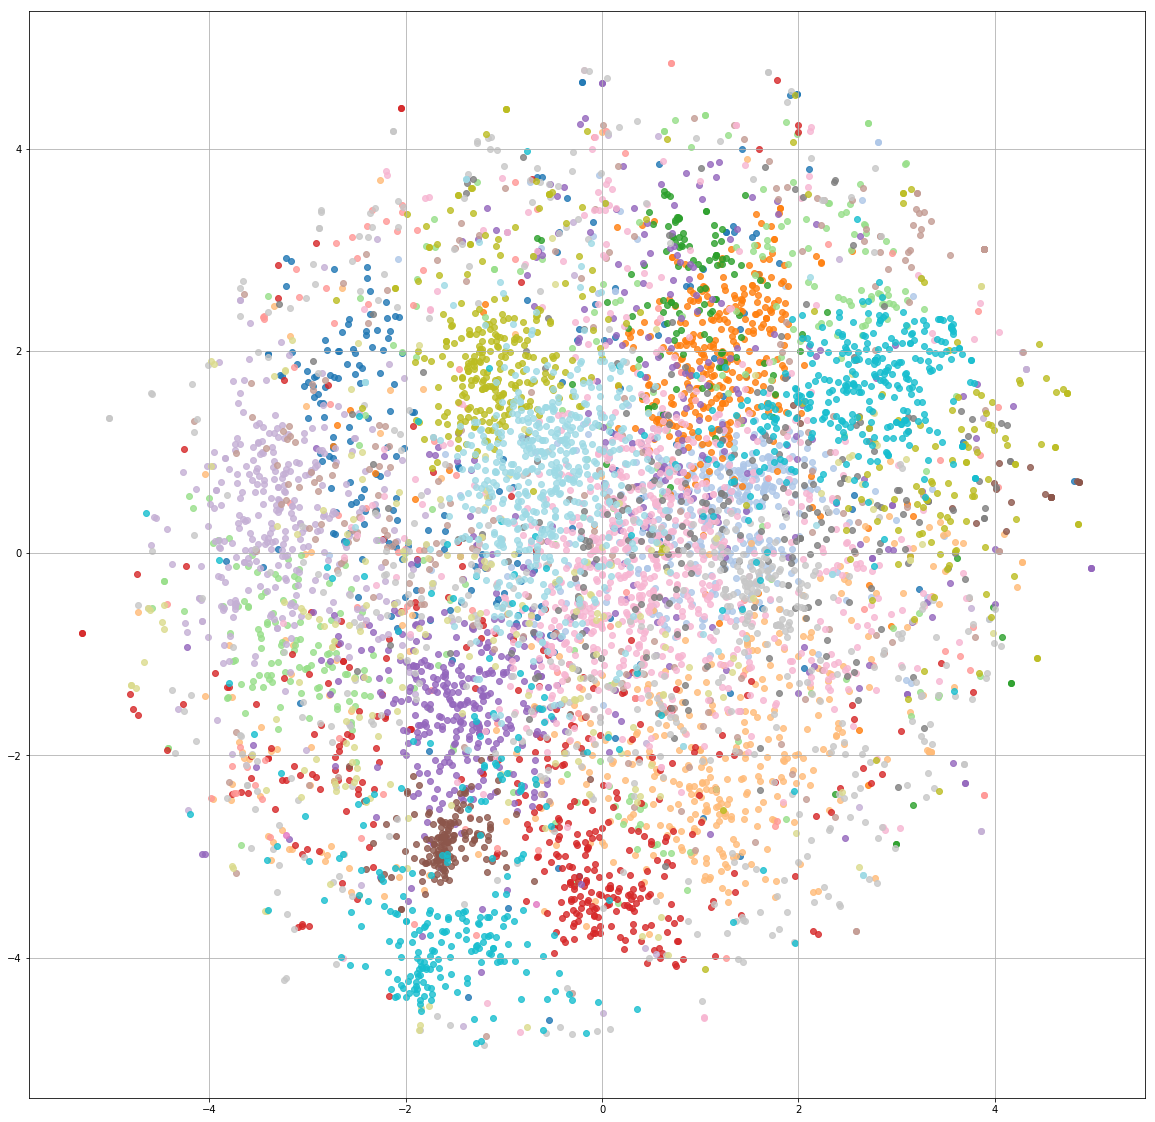

In [11]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])